Image Transformation (i.e. Image Augmentation)

Learn how to apply various image augmentation techniques with TensorFlow. The transformations are meant to be applied for each image sample when training only, and each transformation will be performed with random parameters.

Transformations:

    Random flip left-right
    Random contrast, brightness, saturation and hue
    Random distortion and crop

In [0]:
from  __future__ import print_function, absolute_import, division

from IPython.display import Image as IImage, display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

In [0]:
#download image
d=requests.get("https://www.paristoolkit.com/Images/xeffel_view.jpg.pagespeed.ic.8XcZNqpzSj.jpg")
with open("image.jpeg", "wb") as f:
  f.write(d.content)

In [0]:
#load image to numpy array
img=PIL.Image.open('image.jpeg')
img.load()
img_array=np.array(img)

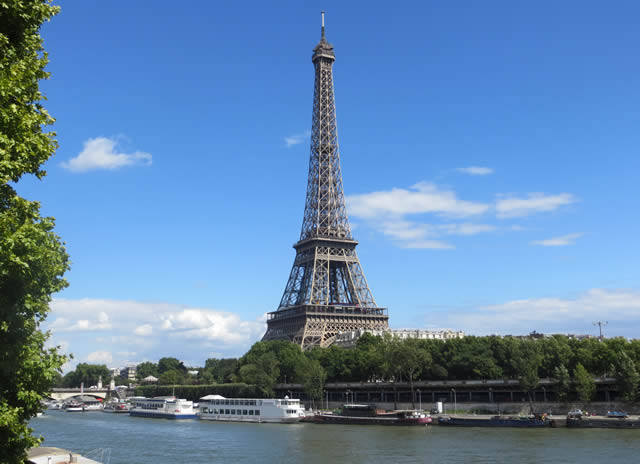

In [4]:
#display image
PIL.Image.fromarray(img_array)

In [0]:
#create tensorflow session
session=tf.Session()

In [0]:
#randomly flip an image
def random_flip_left_right(image):
  return tf.image.random_flip_left_right(image)

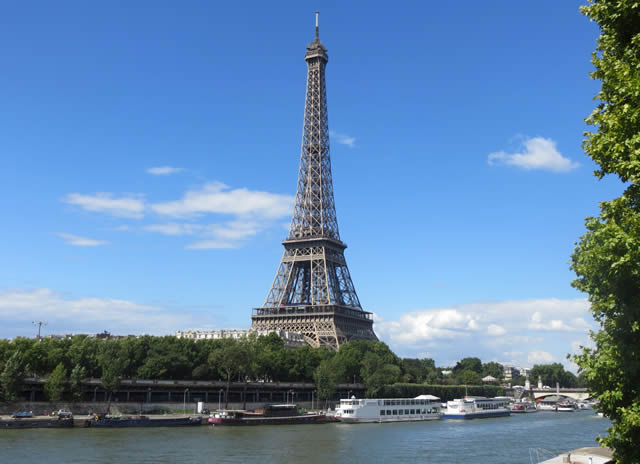

In [8]:
#display randomly flilpped imaged
PIL.Image.fromarray(random_flip_left_right(img_array).eval(session=session))

In [0]:
#randomly change image contrast
def random_contrast(image, minval=0.6, maxval=1.4):
  r=tf.random.uniform([], minval=minval, maxval=maxval)
  image=tf.image.adjust_contrast(image, contrast_factor=r)
  return tf.cast(image, tf.uint8)

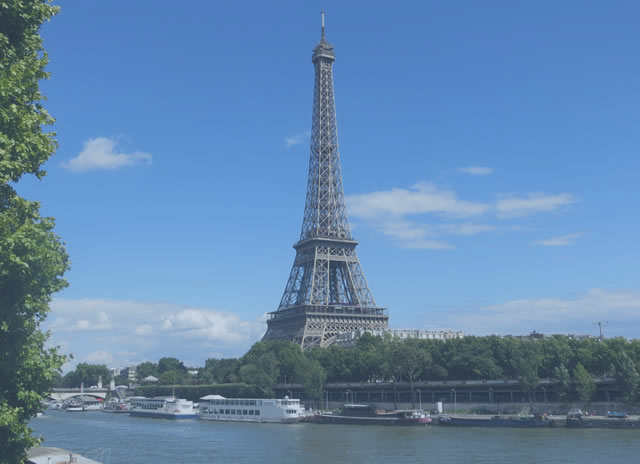

In [10]:
# display image with different contrast
PIL.Image.fromarray(random_contrast(img_array).eval(session=session))

In [0]:
#randomly change image brightness
def random_brightness(image, minval=0.0, maxval=0.2):
  r=tf.random.uniform([], minval=minval, maxval=maxval)
  image=tf.image.adjust_brightness(image, delta=r)
  return tf.cast(image,tf.uint8)

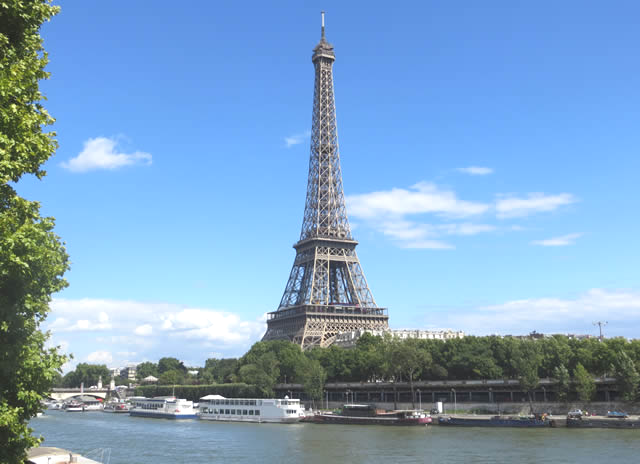

In [15]:
#display image with different brightness
PIL.Image.fromarray(random_brightness(img_array).eval(session=session))

In [0]:
#randomyl change image saturation
def random_saturation(image, minval=0.4, maxval=2.0):
  r=tf.random.uniform((),minval=minval, maxval=maxval)
  image=tf.image.adjust_saturation(image, saturation_factor=r)
  return tf.cast(image,tf.uint8)

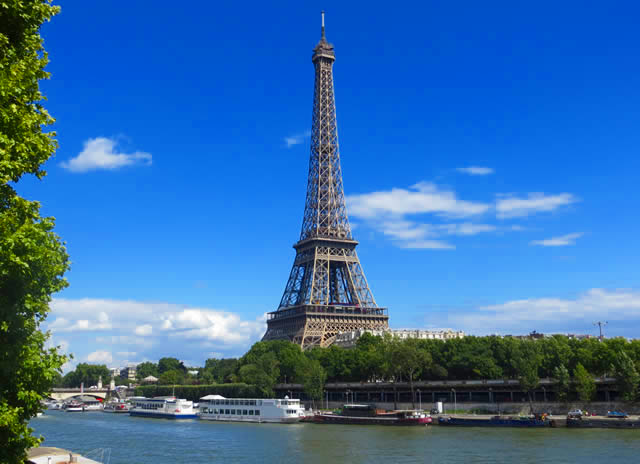

In [17]:
#display image with different saturation
PIL.Image.fromarray(random_saturation(img_array).eval(session=session))

In [0]:
#randomly change image hue
def random_hue(image, minval=-0.04,maxval=0.08):
  r=tf.random.uniform((),minval=minval, maxval=maxval)
  image=tf.image.adjust_hue(image, delta=r)
  return tf.cast(image, tf.uint8)

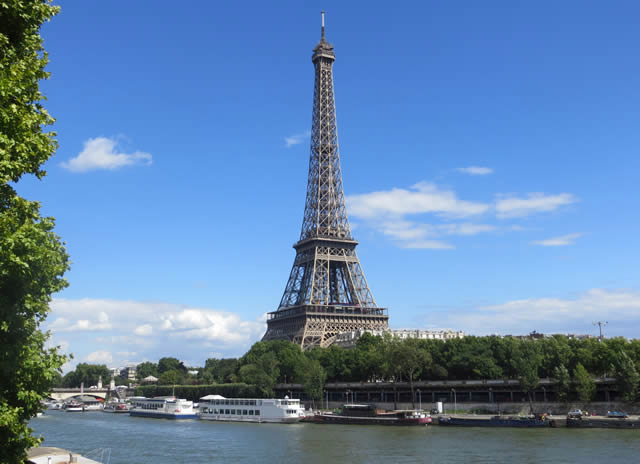

In [21]:
#display image with different hue
PIL.Image.fromarray(random_hue(img_array).eval(session=session))

In [0]:
#distor an image by cropping with different aspect ratio
def distorted_random_crop(image,
                         min_object_covered=0.1,
                         aspect_ratio_range=(3.0/4.0, 4.0/3.0),
                         area_range=(0.06, 1.0),
                         max_attempts=100,
                         scope=None):
  cropbox=tf.constant([0.0,0.0,1.0,1.0],dtype=tf.float32, shape=[1,1,4])
  sample_distorted_bounding_box=tf.image.sample_distorted_bounding_box(
  tf.shape(image),
  bounding_boxes=cropbox,
  min_object_covered=min_object_covered,
  aspect_ratio_range=aspect_ratio_range,
  area_range=area_range,
  max_attempts=max_attempts,
  use_image_if_no_bounding_boxes=True)
  bbox_begin, bbox_size, distort_bbox=sample_distorted_bounding_box
  
  #crop image to speciifed bounding box
  cropped_image=tf.slice(image, bbox_begin, bbox_size)
  return cropped_image

W0826 12:19:59.335786 140535181789056 deprecation.py:323] From <ipython-input-23-aa389977d72c>:15: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


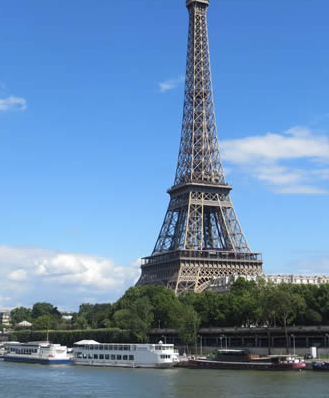

In [24]:
#display colored image
PIL.Image.fromarray(distorted_random_crop(img_array).eval(session=session))

In [0]:
#apply all transformations to an image
#that is a common image augmentation technique for image datasets, such as ImageNet
def transform_image(image):
  image=distorted_random_crop(image)
  image=random_flip_left_right(image)
  image=random_contrast(image)
  image=random_brightness(image)
  image=random_hue(image)
  image=random_saturation(image)
  return image

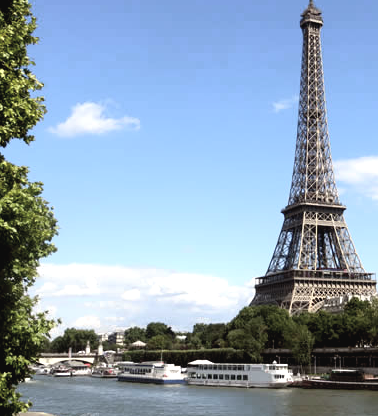

In [27]:
#dsiplay fully pre-processed image
transformed_img=transform_image(img_array)
PIL.Image.fromarray(transformed_img.eval(session=session))

In [0]:
#resize transformed image to 256x256 pixel square image, ready for training
def resize_image(image):
  image=tf.image.resize(image,size=(256,256),preserve_aspect_ratio=False)
  image=tf.cast(image,tf.uint8)
  return image

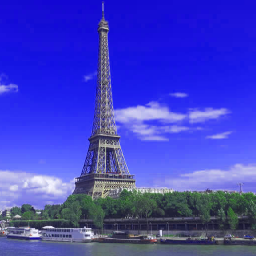

In [32]:
#display resized image
PIL.Image.fromarray(resize_image(transformed_img).eval(session=session))